<a href="https://colab.research.google.com/github/StellaHtet92/Geospatial/blob/main/Atlite_and_DEDE_Regression_Analysis_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install netCDF4
!pip install xarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.6 MB/s eta 0:00:00


In [2]:
!pip install pandas scikit-learn matplotlib seaborn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install atlite
import atlite

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 16.5 MB/s eta 0:00:00
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=0597af6d448d5946a8aa9e50fc245c0bf8845c84b93ce13ed2d43e3e85352d64
  Stored in directory: /root/.cache/pip/wheels/be/05/e0/65a6edb0a000498aeaefbadd80228bf5ed1bdbb82840ca1692
Successfully built multiurl


In [5]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
file_path="/content/drive/MyDrive/atlite_test/thailand-2023-whole-year-02.nc"
dataset=xr.open_dataset(file_path)

In [ ]:
help(dataset)

**Retrieving Data with Coordinates from NC file**

In [6]:
print(dataset.coords)

Coordinates:
  * x        (x) float64 256B 97.5 97.75 98.0 98.25 ... 104.5 104.8 105.0 105.2
  * y        (y) float64 536B 4.25 4.5 4.75 5.0 5.25 ... 20.0 20.25 20.5 20.75
  * time     (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
    lon      (x) float64 256B ...
    lat      (y) float64 536B ...


In [7]:
x=dataset.lon
x

<xarray.DataArray 'lon' (x: 32)> Size: 256B
[32 values with dtype=float64]
Coordinates:
  * x        (x) float64 256B 97.5 97.75 98.0 98.25 ... 104.5 104.8 105.0 105.2
    lon      (x) float64 256B ...

In [8]:
y=dataset.lat
y

<xarray.DataArray 'lat' (y: 67)> Size: 536B
[67 values with dtype=float64]
Coordinates:
  * y        (y) float64 536B 4.25 4.5 4.75 5.0 5.25 ... 20.0 20.25 20.5 20.75
    lat      (y) float64 536B ...

In [9]:
!pip install geopandas -q
import geopandas as gpd
import xarray as xr
import netCDF4 as nc

In [43]:
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability


excluder = ExclusionContainer(crs=32647)  # UTM Zone 47 N

#add building shapefile
#buildings = gpd.read_file('/content/drive/MyDrive/atlite_test/buildings.shp')

#excluder.add_geometry(buildings) # Geometry must be geopandas dataframe

#add railways shapefile
railways = gpd.read_file('/content/drive/MyDrive/atlite_test/railways.shp')

excluder.add_geometry(railways) # Geometry must be geopandas dataframe
#add railways shapefile
#roads = gpd.read_file('/content/drive/MyDrive/atlite_test/roads.shp')

#excluder.add_geometry(roads) # Geometry must be geopandas dataframe

#add railways shapefile
waterways = gpd.read_file('/content/drive/MyDrive/atlite_test/waterways.shp')
excluder.add_geometry(waterways) # Geometry must be geopandas dataframe

#add reserved areas shapefile
reserved_areas = gpd.read_file('/content/drive/MyDrive/atlite_test/Reserved_Areas_Thailand.shp')
excluder.add_geometry(reserved_areas) # Geometry must be geopandas dataframe

In [11]:
shape=gpd.read_file('/content/drive/MyDrive/atlite_test/5_Nodes/Thailand_5_Nodes.shp')
shape.head()

,Control_Ar,ID_0,Shape_Leng,Shape_Area,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT1TH,ADM1ALT2TH,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,total_GHI,percentGHI,geometry
0,North,0,0.000000,0.000000,None,None,None,None,None,None,None,None,None,None,1899-12-30,1899-12-30,1899-12-30,0.000000e+00,0.000,"POLYGON ((97.52036 18.49459, 97.52138 18.49465..."
1,Metropolitan,228,0.000000,0.000000,None,None,None,None,None,None,None,None,None,None,1899-12-30,1899-12-30,1899-12-30,0.000000e+00,0.000,"POLYGON ((100.38375 13.98669, 100.38609 13.986..."
2,Northeast,228,0.000000,0.000000,None,None,None,None,None,None,None,None,None,None,1899-12-30,1899-12-30,1899-12-30,0.000000e+00,0.000,"POLYGON ((103.41059 18.44627, 103.41159 18.446..."
3,Central,228,0.000000,0.000000,None,None,None,None,None,None,None,None,None,None,1899-12-30,1899-12-30,1899-12-30,0.000000e+00,0.000,"POLYGON ((98.59071 15.64435, 98.5969 15.64333,..."
4,South,0,6.914965,0.812886,Southern,?????????????,TH80,None,None,None,None,Thailand,?????????,TH,2019-02-18,2022-01-22,1899-12-30,6.532302e+11,12.585,"MULTIPOLYGON (((101.72484 6.57686, 101.72514 6..."


**Read Cutout**

In [12]:
cutout = atlite.Cutout(
    path="/content/drive/MyDrive/atlite_test/thailand-2023-whole-year-02.nc",  # Change the path to the drive of Thailand data file
    module="era5",
    x=slice(97.29, 105.4),  # Update the longitude range for Thailand
    y=slice(4.06, 20.870032),  # Update the latitude range for Thailand
    time="2023" # Update the time range to January 2023
 )

/usr/local/lib/python3.10/dist-packages/atlite/cutout.py:191: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [13]:
cutout.data

<xarray.Dataset> Size: 1GB
Dimensions:               (x: 32, y: 67, time: 8760)
Coordinates:
  * x                     (x) float64 256B 97.5 97.75 98.0 ... 104.8 105.0 105.2
  * y                     (y) float64 536B 4.25 4.5 4.75 ... 20.25 20.5 20.75
  * time                  (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-3...
    lon                   (x) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    lat                   (y) float64 536B dask.array<chunksize=(67,), meta=np.ndarray>
Data variables: (12/14)
    height                (y, x) float32 9kB dask.array<chunksize=(67, 32), meta=np.ndarray>
    wnd100m               (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    roughness             (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    influx_toa            (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    influx_direct         (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    ...                    ...
    solar_altitude        (time, y, x) float64 150MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    solar_azimuth         (time, y, x) float64 150MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    temperature           (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    soil temperature      (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    runoff                (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
    dewpoint temperature  (time, y, x) float32 75MB dask.array<chunksize=(100, 67, 32), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['influx', 'height', 'temperature', 'runoff', 'wind']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2024-05-15 03:58:42 GMT by grib_to_netcdf-2.28.1: /op...

In [44]:
shape_gpd=gpd.GeoSeries(iter(shape.geometry.to_crs(excluder.crs)),index=shape.Control_Ar)
shape_gpd.crs=excluder.crs
masked, transform = excluder.compute_shape_availability(shape_gpd)

In [15]:
shape_gpd.index

Index(['North', 'Metropolitan', 'Northeast', 'Central', 'South'], dtype='object', name='Control_Ar')

In [45]:
#compute availability matrix
A = cutout.availabilitymatrix(shape_gpd, excluder)

In [ ]:
eligible_share = masked.sum() * excluder.res**2 / shape_gpd.geometry.item().area
print(f"The eligibility share is: {eligible_share:.2%}")

<Axes: title={'center': 'Eligible area (green) 97.11%'}>

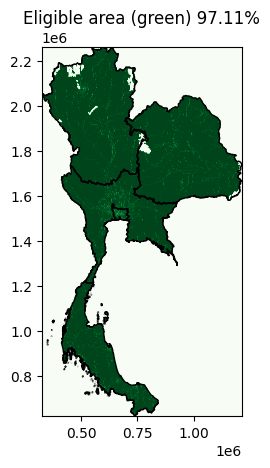

In [47]:
fig, ax = plt.subplots()
excluder.plot_shape_availability(shape)

NameError: name 'eligible_share' is not defined

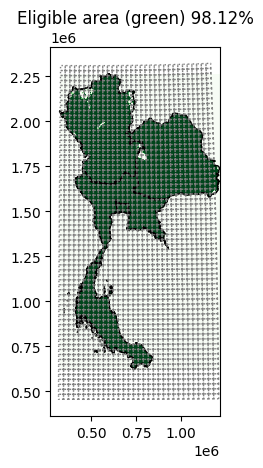

In [22]:
fig, ax = plt.subplots()
excluder.plot_shape_availability(shape, ax=ax)
cutout.grid.to_crs(excluder.crs).plot(edgecolor="grey", color="None", ax=ax, ls=":")
ax.set_title(f"Eligible area (green) {eligible_share:.2%}")
ax.axis("off");

In [21]:
masked_without_index, transform_without_index = excluder.compute_shape_availability(shape)
A_without_index = cutout.availabilitymatrix(shape, excluder)

In [23]:
#compute capacity matrix
cap_per_sqkm = 1.7
area = cutout.grid.set_index(["y", "x"]).to_crs(excluder.crs).area / 1e6 #1e6 is for km*km unit=> so the output is meter
area = xr.DataArray(area, dims=("spatial"))

capacity_matrix = A.stack(spatial=["y", "x"]) * area * cap_per_sqkm

In [24]:
pv = cutout.pv(
    matrix=capacity_matrix,
    panel=atlite.solarpanels.CdTe,
    orientation="latitude_optimal",
    index=shape_gpd.index,
)

In [25]:
#compute capacity matrix without index
cap_per_sqkm = 1.7
area = cutout.grid.set_index(["y", "x"]).to_crs(excluder.crs).area / 1e6 #1e6 is for km*km unit=> so the output is meter
area = xr.DataArray(area, dims=("spatial"))

capacity_matrix_without_index = A_without_index.stack(spatial=["y", "x"]) * area * cap_per_sqkm

In [26]:
area

<xarray.DataArray (spatial: 2144)> Size: 17kB
array([767.1711883 , 767.01032095, 766.87873567, ..., 726.46378105,
       727.03707529, 727.63536161])
Coordinates:
  * spatial  (spatial) object 17kB MultiIndex
  * y        (spatial) float64 17kB 4.25 4.25 4.25 4.25 ... 20.75 20.75 20.75
  * x        (spatial) float64 17kB 97.5 97.75 98.0 98.25 ... 104.8 105.0 105.2

In [28]:
pv_without_index = cutout.pv(
    matrix=capacity_matrix_without_index,
    panel=atlite.solarpanels.CdTe,
    orientation="latitude_optimal"
  )

ValueError: conflicting sizes for dimension 'dim_0': length 10720 on <this-array> and length 5 on {'time': 'time', 'dim_0': 'dim_0', 'spatial': 'dim_0'}

In [29]:
longitude= 13.75 #13.749361 latitude of bkk dede station
latitude= 100.5 #100.5175 longitude of bkk dede station

PV_at_point=pv.sel(x=latitude,y=longitude,method='nearest')

print(PV_at_point)

KeyError: "'x' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'time': 8760, 'Control_Ar': 5})"

In [30]:
longitude= 13.75 #13.749361 latitude of bkk dede station
latitude= 100.5 #100.5175 longitude of bkk dede station

data_at_point=dataset['influx_direct'].sel(x=latitude,y=longitude,method='nearest')

print(data_at_point)

<xarray.DataArray 'influx_direct' (time: 8760)> Size: 35kB
[8760 values with dtype=float32]
Coordinates:
    x        float64 8B 100.5
    y        float64 8B 13.75
  * time     (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
    lon      float64 8B ...
    lat      float64 8B ...
Attributes:
    units:    W m**-2
    module:   era5
    feature:  influx


In [31]:
energy_mj_per_sqm = data_at_point * 3600 / 1e6

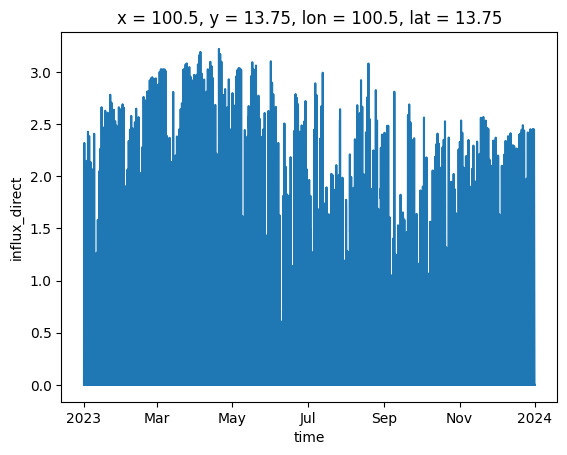

In [32]:
energy_mj_per_sqm.plot()
plt.show()

**Exploratory Data Analysis**

Export point data as CSV

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
energy_mj_per_sqm.shape

(8760,)

In [35]:
PV_Bkk_arr = data_at_point.to_numpy()
PV_Bkk_arr_trans=PV_Bkk_arr.transpose()
PV_BKK_arr_df = pd.DataFrame(PV_Bkk_arr_trans)
PV_BKK_arr_df

,0
0,0.374028
1,68.776634
2,221.156387
3,316.473877
4,443.608429
...,...
8755,0.000000
8756,0.000000
8757,0.000000
8758,0.000000


In [36]:
PV_Bkk_arr_energy = energy_mj_per_sqm.to_numpy()
PV_Bkk_arr_energy_trans=PV_Bkk_arr_energy.transpose()
PV_BKK_arr_energy_df = pd.DataFrame(PV_Bkk_arr_energy_trans)
PV_BKK_arr_energy_df

,0
0,0.001347
1,0.247596
2,0.796163
3,1.139306
4,1.596990
...,...
8755,0.000000
8756,0.000000
8757,0.000000
8758,0.000000


In [37]:
PV_BKK_arr_energy_df.describe()

,0
count,8760.000000
mean,0.547032
std,0.822179
min,0.000000
25%,0.000000
50%,0.007151
75%,0.948621
max,3.219433


In [38]:
PV_BKK_arr_energy_df.to_csv('/content/drive/MyDrive/atlite_test/July 2024/PV_MJ_2023_whole_year_BKKwithDEDEPoints_21112024.csv')

Import CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/atlite_test/July 2024/BKK_Station_Location_Atlite_DEDE_July_2024_V02.csv')

In [ ]:
df.shape

(8761, 2)

In [ ]:
df['Bangkok_Atlite']=df['Bangkok_Atlite'].fillna(0)

In [ ]:
df['Bangkok_DEDE']=df['Bangkok_DEDE'].fillna(0)

Regression Analysis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<Axes: >

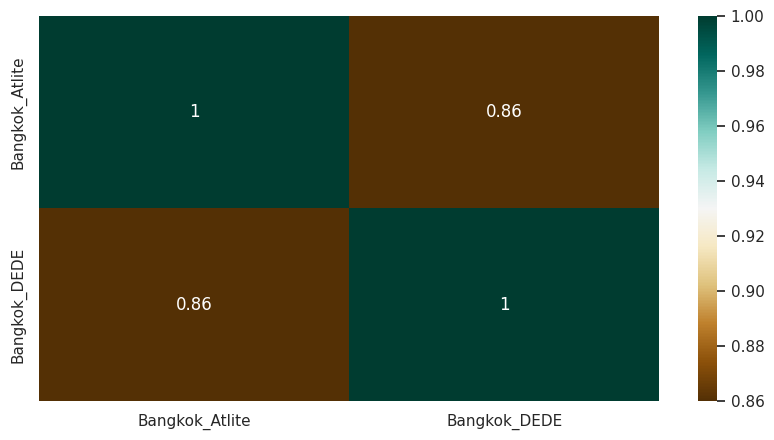

In [ ]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
X = df[['Bangkok_DEDE']]
y = df['Bangkok_Atlite']

In [ ]:
X

,Bangkok_DEDE
0,0.00
1,0.01
2,0.43
3,1.17
4,1.90
...,...
8756,0.00
8757,0.00
8758,0.00
8759,0.00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train=X_train.reshape(-1, 1)
#X_test=X_test.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
#y_test=y_test.reshape(-1, 1)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Get the model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.18611930106625074
R-squared: 0.6981034870954106
Coefficients: [0.72684364]
Intercept: 0.030183865286321554


In [ ]:
X_train

,Bangkok_DEDE
4467,2.45
6403,0.00
8045,3.07
1535,0.00
5647,1.35
...,...
5734,0.00
5191,2.70
5390,0.00
860,0.00
